# **Overview:**

---


* **Objective**: Analyze Formula 1 race data to understand factors influencing race outcomes and provide insights for media companies.
* **Datasets**: Utilized various datasets including driver details, standings, fastest laps, pit stops, race details, qualifying results, and race summaries.
* **Tools**: Employed Python libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, analysis, and visualization.

# **Import all basic libraries**

---



In [3]:
import pandas as pd
import numpy as np
import os #

#Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#hide warning
import warnings
warnings.filterwarnings("ignore")

make a variable named "path" to store multiple files in one variable

In [1]:
path=r'C:\Users\nikhi\BIA\BIA Class Notes\CapStoneProject\F1 Race Predication My Project\Datasets'

Formula 1 is the ultimate motorsport, but it's also a data-driven sport. During the racing weekends, a great deal of data has been collected over the event's 73-year existence. The significance of the starting grid position on the race outcome is a question that is raised every racing weekend. Does taking first place result in a win every time? What would the drivers even be racing for if that were the case? The goal of this initiative is to analyze the data in order to provide media companies with useful and reliable race predictions that will draw in new sponsors and subscribers. via the ML

In [5]:
race_file={}
for mix in os.listdir(path):
    if mix.endswith('.csv'):
        fe = mix.split('.')[0]
        race_file[fe] = pd.read_csv(os.path.join(path, mix))
        print(mix)

constructor_standings.csv
driver_details.csv
driver_standings.csv
fastestlaps_detailed.csv
fastest_laps.csv
pitstops.csv
practices.csv
qualifyings.csv
race_details.csv
race_summaries.csv
sprint_grid.csv
sprint_results.csv
starting_grids.csv
team_details.csv


In [7]:
for i in race_file:
  print(i,":-",race_file[i].shape)

constructor_standings :- (675, 4)
driver_details :- (19814, 7)
driver_standings :- (1618, 7)
fastestlaps_detailed :- (15512, 12)
fastest_laps :- (1078, 6)
pitstops :- (20293, 12)
practices :- (37089, 11)
qualifyings :- (17236, 13)
race_details :- (23978, 11)
race_summaries :- (1082, 8)
sprint_grid :- (120, 9)
sprint_results :- (120, 11)
starting_grids :- (22529, 9)
team_details :- (10334, 5)


# **Analysed all datasets**

---



### 1. Qualifyings Dataset


In [11]:
race_file['qualifyings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17236 entries, 0 to 17235
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         17236 non-null  object 
 1   Detail      17236 non-null  object 
 2   Driver      17236 non-null  object 
 3   DriverCode  17236 non-null  object 
 4   Grand Prix  17236 non-null  object 
 5   Laps        11741 non-null  float64
 6   No          17236 non-null  int64  
 7   Pos         17236 non-null  object 
 8   Q1          7300 non-null   object 
 9   Q2          5351 non-null   object 
 10  Q3          3411 non-null   object 
 11  Time        9899 non-null   object 
 12  Year        17236 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.7+ MB


In [13]:
race_file['qualifyings'].head(5)

,Car,Detail,Driver,DriverCode,Grand Prix,Laps,No,Pos,Q1,Q2,Q3,Time,Year
0,Alfa Romeo,Qualifying,Nino Farina,FAR,Great Britain,NaN,2,1,NaN,NaN,NaN,1:50.800,1950
1,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,NaN,NaN,NaN,1:50.200,1950
2,Kurtis Kraft Offenhauser,Qualifying,Walt Faulkner,FAU,Indianapolis 500,NaN,98,1,NaN,NaN,NaN,1:06.992,1950
3,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,14,1,NaN,NaN,NaN,2:42.100,1950
4,Alfa Romeo,Qualifying,Nino Farina,FAR,Belgium,NaN,8,1,NaN,NaN,NaN,4:37.000,1950


### 2. pitstops Dataset

In [16]:
race_file['pitstops'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20293 entries, 0 to 20292
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Stops        20293 non-null  int64 
 1   No           20293 non-null  int64 
 2   Driver       20293 non-null  object
 3   Car          20292 non-null  object
 4   Lap          20293 non-null  int64 
 5   Time of day  20293 non-null  object
 6   Time         20290 non-null  object
 7   Total        20293 non-null  object
 8   Year         20293 non-null  int64 
 9   Grand Prix   20293 non-null  object
 10  Detail       20293 non-null  object
 11  DriverCode   20293 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.9+ MB


In [18]:
race_file['pitstops'].head(5)

,Stops,No,Driver,Car,Lap,Time of day,Time,Total,Year,Grand Prix,Detail,DriverCode
0,1,20,Erik Comas,Larrousse Ford,1,14:01:34,49.111000000000004,49.111,1994,Pacific,Pit-Stop-Summary,COM
1,1,3,Ukyo Katayama,Tyrrell Yamaha,17,14:20:46,28.482,28.482,1994,Pacific,Pit-Stop-Summary,KAT
2,1,7,Mika Hakkinen,McLaren Peugeot,18,14:22:35,43.745,43.745,1994,Pacific,Pit-Stop-Summary,HAK
3,1,0,Damon Hill,Williams Renault,18,14:23:00,21.991999999999997,21.992,1994,Pacific,Pit-Stop-Summary,HIL
4,1,24,Michele Alboreto,Minardi Ford,19,14:24:39,27.693,27.693,1994,Pacific,Pit-Stop-Summary,ALB


In [20]:
unique_drivers = race_file['pitstops']['Driver'].unique()
unique_drivers

array(['Erik Comas', 'Ukyo Katayama', 'Mika Hakkinen', 'Damon Hill',
       'Michele Alboreto', 'Karl Wendlinger', 'Olivier Panis',
       'Pierluigi Martini', 'Michael Schumacher', 'Christian Fittipaldi',
       'Jos Verstappen', 'Heinz-Harald Frentzen', 'Eric Bernard',
       'Aguri Suzuki', 'Gerhard Berger', 'Martin Brundle',
       'Gianni Morbidelli', 'Roland Ratzenberger', 'Johnny Herbert',
       'Rubens Barrichello', 'Pedro Lamy', 'Andrea de Cesaris',
       'Mark Blundell', 'Bertrand Gachot', 'Nicola Larini',
       'David Coulthard', 'Jyrki Jarvilehto', 'Eddie Irvine',
       'Jean Alesi', 'David Brabham', 'Alessandro Zanardi',
       'Olivier Beretta', 'Nigel Mansell', 'Jean-Marc Gounon',
       'Philippe Alliot', 'Philippe Adams', 'Yannick Dalmas',
       'Domenico Schiattarella', 'Mika Salo', 'Franck Lagorce',
       'Jean-Denis Deletraz', 'Luca Badoer', 'Andrea Montermini',
       'Taki Inoue', 'Roberto Moreno', 'Pedro Diniz',
       'Jean-Christophe Boullion', 'Massimili

In [22]:
race_file['pitstops'][race_file['pitstops']['Driver']=='Nino Farina']

,Stops,No,Driver,Car,Lap,Time of day,Time,Total,Year,Grand Prix,Detail,DriverCode


### 3. driver_details

In [25]:
race_file['driver_details'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19814 entries, 0 to 19813
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car            19807 non-null  object 
 1   Date           19814 non-null  object 
 2   Driver         19814 non-null  object 
 3   Grand Prix     19814 non-null  object 
 4   PTS            19804 non-null  float64
 5   Race Position  19798 non-null  object 
 6   Year           19814 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [27]:
race_file['driver_details'].head(5)

,Car,Date,Driver,Grand Prix,PTS,Race Position,Year
0,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950
1,Ferrari,04 Jun 1950,Alberto Ascari,Switzerland,0.0,DNF,1950
2,Ferrari,18 Jun 1950,Alberto Ascari,Belgium,2.0,5,1950
3,Ferrari,03 Sep 1950,Alberto Ascari,Italy,3.0,2,1950
4,Deidt Offenhauser,30 May 1950,Tony Bettenhausen,Indianapolis 500,1.0,DNF,1950


### 4.race_details

In [30]:
race_file['race_details'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23978 entries, 0 to 23977
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos           23978 non-null  object 
 1   No            23978 non-null  int64  
 2   Driver        23978 non-null  object 
 3   Car           23952 non-null  object 
 4   Laps          23771 non-null  float64
 5   Time/Retired  23970 non-null  object 
 6   PTS           23978 non-null  float64
 7   Year          23978 non-null  int64  
 8   Grand Prix    23978 non-null  object 
 9   Detail        23978 non-null  object 
 10  DriverCode    23978 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.0+ MB


In [32]:
race_file['race_details'].head(5)

,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Year,Grand Prix,Detail,DriverCode
0,1,2,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1950,Great Britain,Race-Result,FAR
1,2,3,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,1950,Great Britain,Race-Result,FAG
2,3,4,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,1950,Great Britain,Race-Result,PAR
3,4,14,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,1950,Great Britain,Race-Result,GIR
4,5,15,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,1950,Great Britain,Race-Result,ROS


### 5. fastestlaps_detailed

In [35]:
race_file['fastestlaps_detailed'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512 entries, 0 to 15511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Avg Speed    9400 non-null   float64
 1   Car          15504 non-null  object 
 2   Detail       15512 non-null  object 
 3   Driver       15512 non-null  object 
 4   DriverCode   15512 non-null  object 
 5   Grand Prix   15512 non-null  object 
 6   Lap          15482 non-null  float64
 7   No           15512 non-null  int64  
 8   Pos          15512 non-null  int64  
 9   Time         15508 non-null  object 
 10  Time of day  3550 non-null   object 
 11  Year         15512 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [37]:
race_file['fastestlaps_detailed'].head(5)

,Avg Speed,Car,Detail,Driver,DriverCode,Grand Prix,Lap,No,Pos,Time,Time of day,Year
0,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Great Britain,2.0,2,1,1:50.600,NaN,1950
1,NaN,Alfa Romeo,Fastest-Laps,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,1:51.000,NaN,1950
2,NaN,Kurtis Kraft Offenhauser,Fastest-Laps,Johnnie Parsons,PAR,Indianapolis 500,NaN,1,1,NaN,NaN,1950
3,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Switzerland,8.0,16,1,2:41.600,NaN,1950
4,NaN,Alfa Romeo,Fastest-Laps,Nino Farina,FAR,Belgium,18.0,8,1,4:34.100,NaN,1950


### 6. driver_standings

In [40]:
race_file['driver_standings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          1618 non-null   object 
 1   Driver       1618 non-null   object 
 2   Nationality  1618 non-null   object 
 3   Car          1607 non-null   object 
 4   PTS          1618 non-null   float64
 5   DriverCode   1618 non-null   object 
 6   Year         1618 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 88.6+ KB


In [42]:
race_file['driver_standings'].head(5)

,Pos,Driver,Nationality,Car,PTS,DriverCode,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,FAR,1950
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,FAN,1950
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,FAG,1950
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,ROS,1950
4,5,Alberto Ascari,ITA,Ferrari,11.0,ASC,1950


### 7. practices

In [45]:
race_file['practices'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37089 entries, 0 to 37088
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         37089 non-null  object 
 1   Detail      37089 non-null  object 
 2   Driver      37089 non-null  object 
 3   DriverCode  37089 non-null  object 
 4   Gap         34760 non-null  object 
 5   Grand Prix  37089 non-null  object 
 6   Laps        31443 non-null  float64
 7   No          37089 non-null  int64  
 8   Pos         37089 non-null  int64  
 9   Time        36423 non-null  object 
 10  Year        37089 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 3.1+ MB


In [47]:
race_file['practices'].head(5)

,Car,Detail,Driver,DriverCode,Gap,Grand Prix,Laps,No,Pos,Time,Year
0,Lotus Renault,Practice-2,Ayrton Senna,SEN,NaN,Mexico,NaN,12,1,1:17.977,1986
1,Benetton BMW,Practice-2,Gerhard Berger,BER,+0.110s,Mexico,NaN,20,2,1:18.088,1986
2,Benetton BMW,Practice-2,Teo Fabi,FAB,+0.176s,Mexico,NaN,19,3,1:18.154,1986
3,Williams Honda,Practice-2,Nelson Piquet,PIQ,+0.376s,Mexico,NaN,6,4,1:18.353,1986
4,Williams Honda,Practice-2,Nigel Mansell,MAN,+0.810s,Mexico,NaN,5,5,1:18.785,1986


### 8. fastest_laps

In [50]:
race_file['fastest_laps'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Grand Prix  1078 non-null   object
 1   Driver      1078 non-null   object
 2   Car         1078 non-null   object
 3   Time        1077 non-null   object
 4   DriverCode  1078 non-null   object
 5   Year        1078 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 50.7+ KB


In [52]:
race_file['fastest_laps'].head(5)

,Grand Prix,Driver,Car,Time,DriverCode,Year
0,Great Britain,Nino Farina,Alfa Romeo,1:50.600,FAR,1950
1,Monaco,Juan Manuel Fangio,Alfa Romeo,1:51.000,FAN,1950
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,NaN,PAR,1950
3,Switzerland,Nino Farina,Alfa Romeo,2:41.600,FAR,1950
4,Belgium,Nino Farina,Alfa Romeo,4:34.100,FAR,1950


### 9. constructor_standings

In [55]:
race_file['constructor_standings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     675 non-null    object 
 1   Team    675 non-null    object 
 2   PTS     675 non-null    float64
 3   Year    675 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.2+ KB


In [57]:
race_file['constructor_standings'].head( )

,Pos,Team,PTS,Year
0,1,Vanwall,48.0,1958
1,2,Ferrari,40.0,1958
2,3,Cooper Climax,31.0,1958
3,4,BRM,18.0,1958
4,5,Maserati,6.0,1958


### 10. sprint_results

In [60]:
race_file['sprint_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pos           120 non-null    object
 1   No            120 non-null    int64 
 2   Driver        120 non-null    object
 3   Car           120 non-null    object
 4   Laps          120 non-null    int64 
 5   Time/Retired  120 non-null    object
 6   PTS           120 non-null    int64 
 7   Year          120 non-null    int64 
 8   Grand Prix    120 non-null    object
 9   Detail        120 non-null    object
 10  DriverCode    120 non-null    object
dtypes: int64(4), object(7)
memory usage: 10.4+ KB


In [62]:
race_file['sprint_results'].head(5)

,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Year,Grand Prix,Detail,DriverCode
0,1,33,Max Verstappen,Red Bull Racing Honda,17,25:38.426,3,2021,Great Britain,Sprint-Results,VER
1,2,44,Lewis Hamilton,Mercedes,17,+1.430s,2,2021,Great Britain,Sprint-Results,HAM
2,3,77,Valtteri Bottas,Mercedes,17,+7.502s,1,2021,Great Britain,Sprint-Results,BOT
3,4,16,Charles Leclerc,Ferrari,17,+11.278s,0,2021,Great Britain,Sprint-Results,LEC
4,5,4,Lando Norris,McLaren Mercedes,17,+24.111s,0,2021,Great Britain,Sprint-Results,NOR


### 11. sprint_grid

In [65]:
race_file['sprint_grid'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pos         120 non-null    int64 
 1   No          120 non-null    int64 
 2   Driver      120 non-null    object
 3   Car         120 non-null    object
 4   Time        116 non-null    object
 5   Year        120 non-null    int64 
 6   Grand Prix  120 non-null    object
 7   Detail      120 non-null    object
 8   DriverCode  120 non-null    object
dtypes: int64(3), object(6)
memory usage: 8.6+ KB


In [67]:
race_file['sprint_grid'].head()

,Pos,No,Driver,Car,Time,Year,Grand Prix,Detail,DriverCode
0,1,44,Lewis Hamilton,Mercedes,1:26.134,2021,Great Britain,Sprint-Grid,HAM
1,2,33,Max Verstappen,Red Bull Racing Honda,1:26.209,2021,Great Britain,Sprint-Grid,VER
2,3,77,Valtteri Bottas,Mercedes,1:26.328,2021,Great Britain,Sprint-Grid,BOT
3,4,16,Charles Leclerc,Ferrari,1:26.828,2021,Great Britain,Sprint-Grid,LEC
4,5,11,Sergio Perez,Red Bull Racing Honda,1:26.844,2021,Great Britain,Sprint-Grid,PER


### 12. race_summaries

In [70]:
race_file['race_summaries'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  1082 non-null   object 
 1   Date        1082 non-null   object 
 2   Winner      1082 non-null   object 
 3   Car         1082 non-null   object 
 4   Laps        1079 non-null   float64
 5   Time        1079 non-null   object 
 6   WinnerCode  1082 non-null   object 
 7   Year        1082 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 67.8+ KB


In [72]:
race_file['race_summaries'].head()

,Grand Prix,Date,Winner,Car,Laps,Time,WinnerCode,Year
0,Great Britain,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950
1,Monaco,21 May 1950,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950
2,Indianapolis 500,30 May 1950,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950
3,Switzerland,04 Jun 1950,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950
4,Belgium,18 Jun 1950,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950


### 13. team_details

In [75]:
race_file['team_details'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10334 entries, 0 to 10333
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  10334 non-null  object 
 1   Date        10334 non-null  object 
 2   PTS         10334 non-null  float64
 3   Year        10334 non-null  int64  
 4   Team        10334 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 403.8+ KB


In [77]:
race_file['team_details'].head(5)

,Grand Prix,Date,PTS,Year,Team
0,Monaco,18 May 1958,2.0,1958,Brm
1,Netherlands,26 May 1958,6.0,1958,Brm
2,Belgium,15 Jun 1958,2.0,1958,Brm
3,France,06 Jul 1958,0.0,1958,Brm
4,Great Britain,19 Jul 1958,2.0,1958,Brm


### 14. starting_grids

In [80]:
race_file['starting_grids'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car         22527 non-null  object
 1   Detail      22529 non-null  object
 2   Driver      22529 non-null  object
 3   DriverCode  22529 non-null  object
 4   Grand Prix  22529 non-null  object
 5   No          22529 non-null  int64 
 6   Pos         22529 non-null  int64 
 7   Time        15657 non-null  object
 8   Year        22529 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


In [82]:
race_file['starting_grids'].head()

,Car,Detail,Driver,DriverCode,Grand Prix,No,Pos,Time,Year
0,Alfa Romeo,Starting-Grid,Juan Manuel Fangio,FAN,Monaco,34,1,1:50.200,1950
1,Alfa Romeo,Starting-Grid,Nino Farina,FAR,Monaco,32,2,NaN,1950
2,Maserati,Starting-Grid,Jose Froilan Gonzalez,GON,Monaco,2,3,NaN,1950
3,Talbot-Lago,Starting-Grid,Philippe Etancelin,ETA,Monaco,14,4,NaN,1950
4,Alfa Romeo,Starting-Grid,Luigi Fagioli,FAG,Monaco,36,5,NaN,1950


# **Datasets used**

---





*   driver_details
*   driver_standings
*   fastest_laps
*   pitstops
*   race_details
*   race_summaries
*   Qualifyings


In [85]:
# select those file are require for our result
select={}
selected_files = ['driver_details','driver_standings','fastest_laps','qualifyings','pitstops','race_details','race_summaries']
for mix in os.listdir(path):
    if mix.endswith('.csv')and(mix.split('.')[0] in selected_files):
        fee = mix.split('.')[0]
        select[fee] = pd.read_csv(os.path.join(path, mix))
        print(mix)

driver_details.csv
driver_standings.csv
fastest_laps.csv
pitstops.csv
qualifyings.csv
race_details.csv
race_summaries.csv


### Race Summaries

In [88]:
select['race_summaries'].head()

,Grand Prix,Date,Winner,Car,Laps,Time,WinnerCode,Year
0,Great Britain,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950
1,Monaco,21 May 1950,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950
2,Indianapolis 500,30 May 1950,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950
3,Switzerland,04 Jun 1950,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950
4,Belgium,18 Jun 1950,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950


### Fastest laps

In [91]:
select['fastest_laps'].head()

,Grand Prix,Driver,Car,Time,DriverCode,Year
0,Great Britain,Nino Farina,Alfa Romeo,1:50.600,FAR,1950
1,Monaco,Juan Manuel Fangio,Alfa Romeo,1:51.000,FAN,1950
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,NaN,PAR,1950
3,Switzerland,Nino Farina,Alfa Romeo,2:41.600,FAR,1950
4,Belgium,Nino Farina,Alfa Romeo,4:34.100,FAR,1950


### Race details

In [94]:
select['race_details'].sample(5)

,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Year,Grand Prix,Detail,DriverCode
8556,4,15,Alain Prost,Renault,45.0,+120.750s,3.0,1983,Germany,Race-Result,PRO
11523,7,25,Thierry Boutsen,Ligier Lamborghini,58.0,+3 laps,0.0,1991,San Marino,Race-Result,BOU
7937,NC,3,Eddie Cheever,Tyrrell Ford,10.0,DNF,0.0,1981,Las Vegas,Race-Result,CHE
21978,1,44,Lewis Hamilton,Mercedes,66.0,1:35:29.972,25.0,2018,Spain,Race-Result,HAM
3219,8,19,Bob Anderson,Brabham Climax,26.0,+2 laps,0.0,1967,Belgium,Race-Result,AND


In [96]:
select['race_details'][['Time/Retired']].value_counts().sort_index()

Time/Retired
+0 lap            75
+0.010s            1
+0.011s            1
+0.014s            1
+0.050s            1
                ... 
DNF             9255
DNS              107
DSQ               48
OK                23
SHC              108
Name: count, Length: 6774, dtype: int64

In [97]:
select['race_details'][['Laps']].value_counts().sort_index()

Laps 
0.0      657
1.0      307
2.0      221
3.0      196
4.0      182
        ... 
195.0      4
196.0     10
197.0      5
199.0      3
200.0    111
Name: count, Length: 172, dtype: int64

In [99]:
select['race_details'][['PTS']].value_counts().sort_index()

PTS 
0.0     16262
0.1         3
0.5         6
1.0      1021
1.3         1
1.5        16
2.0      1076
2.5         1
3.0       822
3.1         1
3.3         2
3.5         2
4.0      1069
4.1         1
4.5         4
5.0       133
6.0      1049
6.1         1
6.5         3
7.0        12
7.5         1
8.0       431
8.1         1
8.5         2
9.0       442
10.0      570
11.0        6
12.0      252
12.5        1
13.0        7
15.0      250
16.0        9
18.0      240
19.0       18
20.0        1
24.0        1
25.0      233
26.0       25
30.0        1
36.0        1
50.0        1
Name: count, dtype: int64

In [102]:
# select['race_details'][['Pos']].value_counts().sort_index(ignore_index=False,level= )
select['race_details'][['Pos']].value_counts().sort_index(key=lambda x: x.str.lower())

Pos
1      1083
10      933
11      859
12      761
13      669
14      568
15      489
16      399
17      308
18      207
19      136
2      1088
20       74
21       40
22       28
23       18
24       14
25       12
26       10
27       12
28       11
29        9
3      1088
30       12
31       12
32       10
33       11
4      1089
5      1086
6      1079
7      1062
8      1033
9       994
DQ       59
EX        2
NC     8713
Name: count, dtype: int64

In [104]:
select['race_details'][['No']].value_counts().sort_index()

No 
0       34
1      783
2      908
3      934
4      921
      ... 
128      1
129      1
130      1
135      1
136      1
Name: count, Length: 127, dtype: int64

In [106]:
select['race_details'][['Driver']].value_counts().sort_index()

Driver               
Adolf Brudes               1
Adolfo Schewelm Cruz       1
Adrian Campos             17
Adrian Sutil             128
Aguri Suzuki              62
                        ... 
Yuji Ide                   4
Yuki Tsunoda              45
Yves Giraud-Cabantous     13
Zhou Guanyu               23
Zsolt Baumgartner         20
Name: count, Length: 781, dtype: int64

### Driver_standing

In [109]:
select['driver_standings'].head()

,Pos,Driver,Nationality,Car,PTS,DriverCode,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,FAR,1950
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,FAN,1950
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,FAG,1950
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,ROS,1950
4,5,Alberto Ascari,ITA,Ferrari,11.0,ASC,1950


In [111]:
select['driver_standings'][['PTS']].value_counts().sort_index()

PTS  
0.0      134
0.1        1
0.5        2
1.0      120
1.1        1
        ... 
395.5      1
397.0      1
408.0      1
413.0      1
454.0      1
Name: count, Length: 205, dtype: int64

In [113]:
select['driver_standings'][['Pos']].value_counts().sort_index()

Pos
1      73
10     75
11     76
12     78
13     81
14     66
15     81
16     72
17     67
18     97
19     74
2      75
20     44
21     32
22     34
23     24
24     16
25     13
26      9
27      4
28      1
3      73
4      75
5      71
6      77
7      77
8      75
9      77
DQ      1
Name: count, dtype: int64

### Driver Details

In [116]:
df=select['driver_details']
df.head(10)

,Car,Date,Driver,Grand Prix,PTS,Race Position,Year
0,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950
1,Ferrari,04 Jun 1950,Alberto Ascari,Switzerland,0.0,DNF,1950
2,Ferrari,18 Jun 1950,Alberto Ascari,Belgium,2.0,5,1950
3,Ferrari,03 Sep 1950,Alberto Ascari,Italy,3.0,2,1950
4,Deidt Offenhauser,30 May 1950,Tony Bettenhausen,Indianapolis 500,1.0,DNF,1950
5,Kurtis Kraft Offenhauser,30 May 1950,Tony Bettenhausen,Indianapolis 500,1.0,5,1950
6,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950
7,Maserati,21 May 1950,Prince Bira,Monaco,2.0,5,1950
8,Maserati,04 Jun 1950,Prince Bira,Switzerland,3.0,4,1950
9,Maserati,03 Sep 1950,Prince Bira,Italy,0.0,DNF,1950


In [118]:
select['driver_details'][['Race Position']].value_counts().sort_index()

Race Position
1                1077
10                669
11                601
12                530
13                487
14                407
15                359
16                284
17                225
18                145
19                 91
2                1072
20                 45
21                 23
22                 12
23                  5
24                  1
3                1068
4                1062
5                1052
6                1003
7                 861
8                 820
9                 745
DNC                75
DNF              6924
DNS                60
DSQ                42
EXR                 2
SHC                51
Name: count, dtype: int64

In [120]:
select['driver_details'][['PTS']].value_counts().sort_index()

PTS 
0.0     12085
0.1         3
0.5         6
1.0      1024
1.3         1
1.5        16
2.0      1079
2.5         1
3.0       824
3.1         1
3.3         2
3.5         2
4.0      1068
4.1         1
4.5         4
5.0       134
6.0      1049
6.1         1
6.5         3
7.0        12
7.5         1
8.0       427
8.1         1
8.5         2
9.0       443
10.0      568
11.0        6
12.0      250
12.5        1
13.0        9
15.0      245
16.0       11
17.0        1
18.0      239
19.0       17
20.0        2
22.0        1
24.0        3
25.0      230
26.0       22
27.0        3
30.0        1
32.0        1
34.0        2
36.0        1
50.0        1
Name: count, dtype: int64

### Pitstops

In [123]:
select['pitstops'].head()

,Stops,No,Driver,Car,Lap,Time of day,Time,Total,Year,Grand Prix,Detail,DriverCode
0,1,20,Erik Comas,Larrousse Ford,1,14:01:34,49.111000000000004,49.111,1994,Pacific,Pit-Stop-Summary,COM
1,1,3,Ukyo Katayama,Tyrrell Yamaha,17,14:20:46,28.482,28.482,1994,Pacific,Pit-Stop-Summary,KAT
2,1,7,Mika Hakkinen,McLaren Peugeot,18,14:22:35,43.745,43.745,1994,Pacific,Pit-Stop-Summary,HAK
3,1,0,Damon Hill,Williams Renault,18,14:23:00,21.991999999999997,21.992,1994,Pacific,Pit-Stop-Summary,HIL
4,1,24,Michele Alboreto,Minardi Ford,19,14:24:39,27.693,27.693,1994,Pacific,Pit-Stop-Summary,ALB


In [125]:
select['pitstops'][['No']].value_counts().sort_index()

No
0      22
1     765
2     707
3     980
4     844
5     953
6     857
7     905
8     814
9     816
10    759
11    921
12    643
13     66
14    882
15    531
16    779
17    583
18    715
19    612
20    821
21    640
22    677
23    599
24    240
25    210
26    273
27    253
28    111
29     36
30     99
31    223
32     14
33    245
34      3
35     31
36      2
39      2
40      1
44    363
45      2
46      2
47    119
51      6
53     11
55    299
63    192
77    350
88     67
89      3
94     78
98     25
99    142
Name: count, dtype: int64

### qualifyings

In [128]:
select['qualifyings'].head()

,Car,Detail,Driver,DriverCode,Grand Prix,Laps,No,Pos,Q1,Q2,Q3,Time,Year
0,Alfa Romeo,Qualifying,Nino Farina,FAR,Great Britain,NaN,2,1,NaN,NaN,NaN,1:50.800,1950
1,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,NaN,NaN,NaN,1:50.200,1950
2,Kurtis Kraft Offenhauser,Qualifying,Walt Faulkner,FAU,Indianapolis 500,NaN,98,1,NaN,NaN,NaN,1:06.992,1950
3,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,14,1,NaN,NaN,NaN,2:42.100,1950
4,Alfa Romeo,Qualifying,Nino Farina,FAR,Belgium,NaN,8,1,NaN,NaN,NaN,4:37.000,1950


In [130]:
select['qualifyings'][['Laps']].value_counts().sort_index()

Laps
0.0        3
1.0       23
2.0       59
3.0      616
4.0       50
5.0       97
6.0      784
7.0      253
8.0      395
9.0      589
10.0     573
11.0    1044
12.0    1849
13.0     326
14.0     479
15.0     502
16.0     465
17.0     519
18.0     510
19.0     420
20.0     426
21.0     403
22.0     353
23.0     310
24.0     287
25.0      97
26.0      93
27.0      48
28.0      45
29.0      37
30.0      33
31.0      27
32.0      10
33.0       9
34.0       5
35.0       2
Name: count, dtype: int64

In [132]:
select['qualifyings'][['No']].value_counts().sort_index()

No 
0       32
1      582
2      603
3      717
4      638
5      739
6      678
7      675
8      647
9      626
10     634
11     726
12     581
13      38
14     636
15     514
16     633
17     503
18     542
19     521
20     641
21     509
22     555
23     538
24     310
25     303
26     326
27     341
28     252
29     175
30     216
31     219
32      95
33     249
34      84
35      83
36      57
37      16
38      17
39      28
40      22
41      16
42       1
44     198
45       3
46       1
47      60
51       2
53       5
55     180
63      99
71       1
77     199
88      35
89       1
94      39
97       1
98      14
99      79
101      1
Name: count, dtype: int64

In [134]:
select['qualifyings'][['Pos']].value_counts().sort_index()

Pos
1      1095
10      739
11      739
12      739
13      738
14      723
15      723
16      723
17      722
18      721
19      704
2       723
20      668
21      454
22      422
23      258
24      243
25      186
26      167
27      104
28       91
29       75
3       725
30       66
4       723
5       775
6       772
7       766
8       759
9       746
DQ        1
EX        2
NC      136
RT        8
Name: count, dtype: int64

# **Data Merge**

---



### driver_standings and driver_details

In [138]:
select['driver_details'].head()

,Car,Date,Driver,Grand Prix,PTS,Race Position,Year
0,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950
1,Ferrari,04 Jun 1950,Alberto Ascari,Switzerland,0.0,DNF,1950
2,Ferrari,18 Jun 1950,Alberto Ascari,Belgium,2.0,5,1950
3,Ferrari,03 Sep 1950,Alberto Ascari,Italy,3.0,2,1950
4,Deidt Offenhauser,30 May 1950,Tony Bettenhausen,Indianapolis 500,1.0,DNF,1950


In [140]:
select['driver_standings'].head()

,Pos,Driver,Nationality,Car,PTS,DriverCode,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,FAR,1950
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,FAN,1950
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,FAG,1950
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,ROS,1950
4,5,Alberto Ascari,ITA,Ferrari,11.0,ASC,1950


In [142]:
#use left data merge
df=select['driver_details'].merge(select['driver_standings'][['Driver','PTS','Year','Pos']],on=['Year','Driver'],how='left')

left ke 'driver_details se common columns right side dataset 'driver_standings'se 'Driver','PTS','Year' columns merge kiya h

In [145]:
df.head()

,Car,Date,Driver,Grand Prix,PTS_x,Race Position,Year,PTS_y,Pos
0,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950,11.0,5
1,Ferrari,04 Jun 1950,Alberto Ascari,Switzerland,0.0,DNF,1950,11.0,5
2,Ferrari,18 Jun 1950,Alberto Ascari,Belgium,2.0,5,1950,11.0,5
3,Ferrari,03 Sep 1950,Alberto Ascari,Italy,3.0,2,1950,11.0,5
4,Deidt Offenhauser,30 May 1950,Tony Bettenhausen,Indianapolis 500,1.0,DNF,1950,1.0,20


### New dataset df and race_summaries

In [148]:
select['race_summaries'].head()

,Grand Prix,Date,Winner,Car,Laps,Time,WinnerCode,Year
0,Great Britain,13 May 1950,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950
1,Monaco,21 May 1950,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950
2,Indianapolis 500,30 May 1950,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950
3,Switzerland,04 Jun 1950,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950
4,Belgium,18 Jun 1950,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950


In [150]:
#use left data merge
df=df.merge(select['race_summaries'][['Winner','Laps','Year','Grand Prix','Time','Date']],on=['Year','Grand Prix','Date'],how='right')

In [152]:
df.head(10)

,Car,Date,Driver,Grand Prix,PTS_x,Race Position,Year,PTS_y,Pos,Winner,Laps,Time
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600
5,Alfa Romeo,13 May 1950,Juan Manuel Fangio,Great Britain,0.0,DNF,1950,27.0,2,Nino Farina,70.0,2:13:23.600
6,Alfa Romeo,13 May 1950,Nino Farina,Great Britain,9.0,1,1950,30.0,1,Nino Farina,70.0,2:13:23.600
7,Alfa Romeo,13 May 1950,Reg Parnell,Great Britain,4.0,3,1950,4.0,9,Nino Farina,70.0,2:13:23.600
8,Talbot-Lago,13 May 1950,Louis Rosier,Great Britain,2.0,5,1950,13.0,4,Nino Farina,70.0,2:13:23.600
9,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950,11.0,5,Juan Manuel Fangio,100.0,3:13:18.700


 Rename columns

In [155]:
df=df.rename(columns={'GrandPrix':'Grand Prix','PTS_x':'StandingPoints','Race Position':'RacePosition','PTS_y':'DriverPoints','Time':'FinshTime','Pos':'StandingPosition'})

In [157]:
df.head()

,Car,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,Laps,FinshTime
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600


### New dataset df and race details

In [160]:
df.head()

,Car,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,Laps,FinshTime
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600


In [162]:
select['race_details'].head()

,Pos,No,Driver,Car,Laps,Time/Retired,PTS,Year,Grand Prix,Detail,DriverCode
0,1,2,Nino Farina,Alfa Romeo,70.0,2:13:23.600,9.0,1950,Great Britain,Race-Result,FAR
1,2,3,Luigi Fagioli,Alfa Romeo,70.0,+2.600s,6.0,1950,Great Britain,Race-Result,FAG
2,3,4,Reg Parnell,Alfa Romeo,70.0,+52.000s,4.0,1950,Great Britain,Race-Result,PAR
3,4,14,Yves Giraud-Cabantous,Talbot-Lago,68.0,+2 laps,3.0,1950,Great Britain,Race-Result,GIR
4,5,15,Louis Rosier,Talbot-Lago,68.0,+2 laps,2.0,1950,Great Britain,Race-Result,ROS


In [164]:
#use left data merge
df=df.merge(select['race_details'][['Pos','Laps','Year','Grand Prix','No','PTS','Car','Driver']],on=['Year','Grand Prix','Driver','Laps'],how='left')

In [166]:
df.head()

,Car_x,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,Laps,FinshTime,Pos,No,PTS,Car_y
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600,2,3.0,6.0,Alfa Romeo


In [168]:
# Rename columns
df=df.rename(columns={'Car_x':'DriverCars','Car_y':'WinnerCars'})

In [170]:
df.head()

,DriverCars,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,Laps,FinshTime,Pos,No,PTS,WinnerCars
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600,2,3.0,6.0,Alfa Romeo


### New dataset and qualifyings

In [173]:
df.head(10)

,DriverCars,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,Laps,FinshTime,Pos,No,PTS,WinnerCars
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,70.0,2:13:23.600,2,3.0,6.0,Alfa Romeo
5,Alfa Romeo,13 May 1950,Juan Manuel Fangio,Great Britain,0.0,DNF,1950,27.0,2,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
6,Alfa Romeo,13 May 1950,Nino Farina,Great Britain,9.0,1,1950,30.0,1,Nino Farina,70.0,2:13:23.600,1,2.0,9.0,Alfa Romeo
7,Alfa Romeo,13 May 1950,Reg Parnell,Great Britain,4.0,3,1950,4.0,9,Nino Farina,70.0,2:13:23.600,3,4.0,4.0,Alfa Romeo
8,Talbot-Lago,13 May 1950,Louis Rosier,Great Britain,2.0,5,1950,13.0,4,Nino Farina,70.0,2:13:23.600,NaN,NaN,NaN,NaN
9,Ferrari,21 May 1950,Alberto Ascari,Monaco,6.0,2,1950,11.0,5,Juan Manuel Fangio,100.0,3:13:18.700,NaN,NaN,NaN,NaN


In [175]:
select['qualifyings'].head(10)

,Car,Detail,Driver,DriverCode,Grand Prix,Laps,No,Pos,Q1,Q2,Q3,Time,Year
0,Alfa Romeo,Qualifying,Nino Farina,FAR,Great Britain,NaN,2,1,NaN,NaN,NaN,1:50.800,1950
1,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Monaco,NaN,34,1,NaN,NaN,NaN,1:50.200,1950
2,Kurtis Kraft Offenhauser,Qualifying,Walt Faulkner,FAU,Indianapolis 500,NaN,98,1,NaN,NaN,NaN,1:06.992,1950
3,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,14,1,NaN,NaN,NaN,2:42.100,1950
4,Alfa Romeo,Qualifying,Nino Farina,FAR,Belgium,NaN,8,1,NaN,NaN,NaN,4:37.000,1950
5,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,France,NaN,6,1,NaN,NaN,NaN,2:30.600,1950
6,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Italy,NaN,18,1,NaN,NaN,NaN,1:58.600,1950
7,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Switzerland,NaN,24,1,NaN,NaN,NaN,2:35.900,1951
8,Kurtis Kraft Novi,Qualifying,Duke Nalon,NAL,Indianapolis 500,NaN,18,1,NaN,NaN,NaN,1:05.935,1951
9,Alfa Romeo,Qualifying,Juan Manuel Fangio,FAN,Belgium,NaN,2,1,NaN,NaN,NaN,4:25.000,1951


In [177]:
select['qualifyings'].shape

(17236, 13)

In [179]:
#use left data merge
df=df.merge(select['qualifyings'][['Pos','Laps','Year','Grand Prix','No','Q1','Q2','Q3','Time','Driver']],on=['Year','Grand Prix','Driver','No'],how='left')

In [181]:
df.head()

,DriverCars,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,Winner,...,Pos_x,No,PTS,WinnerCars,Pos_y,Laps_y,Q1,Q2,Q3,Time
0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,Nino Farina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,Nino Farina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,Nino Farina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,Nino Farina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,Nino Farina,...,2,3.0,6.0,Alfa Romeo,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# Rename columns
df=df.rename(columns={'Laps_x':'winnerLaps','Pos_x':'WinnerPosition','Pos_y':'QualifyPositions','Laps_y':'QualifyLaps'})

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DriverCars        20067 non-null  object 
 1   Date              20074 non-null  object 
 2   Driver            20074 non-null  object 
 3   Grand Prix        20074 non-null  object 
 4   StandingPoints    20063 non-null  float64
 5   RacePosition      20058 non-null  object 
 6   Year              20074 non-null  int64  
 7   DriverPoints      18451 non-null  float64
 8   StandingPosition  18451 non-null  object 
 9   Winner            20074 non-null  object 
 10  winnerLaps        20041 non-null  float64
 11  FinshTime         20041 non-null  object 
 12  WinnerPosition    6737 non-null   object 
 13  No                6737 non-null   float64
 14  PTS               6737 non-null   float64
 15  WinnerCars        6737 non-null   object 
 16  QualifyPositions  5427 non-null   object

#**Export file**

---



In [188]:
df.to_csv("Final_data_11.csv")

In [190]:
df=pd.read_csv("Final_data_11.csv")
df.head()

,Unnamed: 0,DriverCars,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,...,WinnerPosition,No,PTS,WinnerCars,QualifyPositions,QualifyLaps,Q1,Q2,Q3,Time
0,0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,...,2,3.0,6.0,Alfa Romeo,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.columns

Index(['Unnamed: 0', 'DriverCars', 'Date', 'Driver', 'Grand Prix',
       'StandingPoints', 'RacePosition', 'Year', 'DriverPoints',
       'StandingPosition', 'Winner', 'winnerLaps', 'FinshTime',
       'WinnerPosition', 'No', 'PTS', 'WinnerCars', 'QualifyPositions',
       'QualifyLaps', 'Q1', 'Q2', 'Q3', 'Time'],
      dtype='object')

* DriverCars:- Indicates the car used by the driver during the race.
* StandingPoints:-
* DriverPoints:-
* StandingPosition:-
* Winner:-The name of the driver wins in the race.
* winnerLaps:- how many laps take to compelete race
* FinshTime:- winner finish time
* WinnerPosition:- Winner position after wins the race
* No:-
* PTS:- The points earned by the driver in that particular race.The higher a driver finishes, the more points they accumulate.
* WinnerCars:- Indicates the car used by the driver wins the race.
* QualifyPositions:-
* QualifyLaps:-
* Q1:-Qualifiy 1
* Q2:-Qualifiy 2
* Q3:-Qualifiy 3
* Time:-
* Date: The date of the Grand Prix event.
* Grand Prix: The specific Grand Prix event (race) where the driver competed.
* Race Position:-The finishing position of the driver in the race,DNC: Stands for Did Not Compete,DNS: Stands for Did Not Start,EXR: Stands for Excluded from Race,DSQ: Stands for Disqualified.
* Year: The year of the Formula 1 season..

# **Data Processing**

---



In [196]:
df.head()

,Unnamed: 0,DriverCars,Date,Driver,Grand Prix,StandingPoints,RacePosition,Year,DriverPoints,StandingPosition,...,WinnerPosition,No,PTS,WinnerCars,QualifyPositions,QualifyLaps,Q1,Q2,Q3,Time
0,0,Maserati,13 May 1950,Prince Bira,Great Britain,0.0,DNF,1950,5.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Talbot-Lago,13 May 1950,Yves Giraud Cabantous,Great Britain,NaN,4,1950,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Maserati,13 May 1950,Louis Chiron,Great Britain,0.0,DNF,1950,4.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Talbot-Lago,13 May 1950,Philippe Etancelin,Great Britain,0.0,8,1950,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Alfa Romeo,13 May 1950,Luigi Fagioli,Great Britain,6.0,2,1950,24.0,3,...,2,3.0,6.0,Alfa Romeo,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20074 non-null  int64  
 1   DriverCars        20067 non-null  object 
 2   Date              20074 non-null  object 
 3   Driver            20074 non-null  object 
 4   Grand Prix        20074 non-null  object 
 5   StandingPoints    20063 non-null  float64
 6   RacePosition      20058 non-null  object 
 7   Year              20074 non-null  int64  
 8   DriverPoints      18451 non-null  float64
 9   StandingPosition  18451 non-null  object 
 10  Winner            20074 non-null  object 
 11  winnerLaps        20041 non-null  float64
 12  FinshTime         20041 non-null  object 
 13  WinnerPosition    6737 non-null   object 
 14  No                6737 non-null   float64
 15  PTS               6737 non-null   float64
 16  WinnerCars        6737 non-null   object

In [200]:
df.dtypes

Unnamed: 0            int64
DriverCars           object
Date                 object
Driver               object
Grand Prix           object
StandingPoints      float64
RacePosition         object
Year                  int64
DriverPoints        float64
StandingPosition     object
Winner               object
winnerLaps          float64
FinshTime            object
WinnerPosition       object
No                  float64
PTS                 float64
WinnerCars           object
QualifyPositions     object
QualifyLaps         float64
Q1                   object
Q2                   object
Q3                   object
Time                 object
dtype: object

## EDA[Exploratory Data Analysis]

In [203]:
df.describe()

,Unnamed: 0,StandingPoints,Year,DriverPoints,winnerLaps,No,PTS,QualifyLaps
count,20074.000000,20063.000000,20074.000000,18451.000000,20041.000000,6737.000000,6737.000000,4523.000000
mean,10036.500000,2.521687,1994.431105,44.445423,63.513497,15.100638,6.488348,15.129560
std,5795.008988,4.723089,19.079052,74.260753,16.557829,16.688042,6.045635,6.093661
min,0.000000,0.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5018.250000,0.000000,1979.000000,4.000000,54.000000,5.000000,2.000000,11.000000
50%,10036.500000,0.000000,1997.000000,16.000000,63.000000,10.000000,5.000000,15.000000
75%,15054.750000,3.000000,2011.000000,49.000000,72.000000,19.000000,9.000000,20.000000
max,20073.000000,50.000000,2022.000000,454.000000,200.000000,117.000000,50.000000,35.000000


In [205]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Unnamed: 0,StandingPoints,Year,DriverPoints,winnerLaps,No,PTS,QualifyLaps
Unnamed: 0,1.000000,0.262432,0.989697,0.424260,-0.196849,0.245387,0.274032,0.301488
StandingPoints,0.262432,1.000000,0.235075,0.759740,-0.028996,0.124892,0.998617,0.272759
Year,0.989697,0.235075,1.000000,0.394359,-0.204384,0.200584,0.248710,0.301402
DriverPoints,0.424260,0.759740,0.394359,1.000000,-0.080143,0.193230,0.778323,0.291765
winnerLaps,-0.196849,-0.028996,-0.204384,-0.080143,1.000000,0.018250,0.033922,0.108119
No,0.245387,0.124892,0.200584,0.193230,0.018250,1.000000,0.123232,0.145101
PTS,0.274032,0.998617,0.248710,0.778323,0.033922,0.123232,1.000000,0.269623
QualifyLaps,0.301488,0.272759,0.301402,0.291765,0.108119,0.145101,0.269623,1.000000


<Axes: >

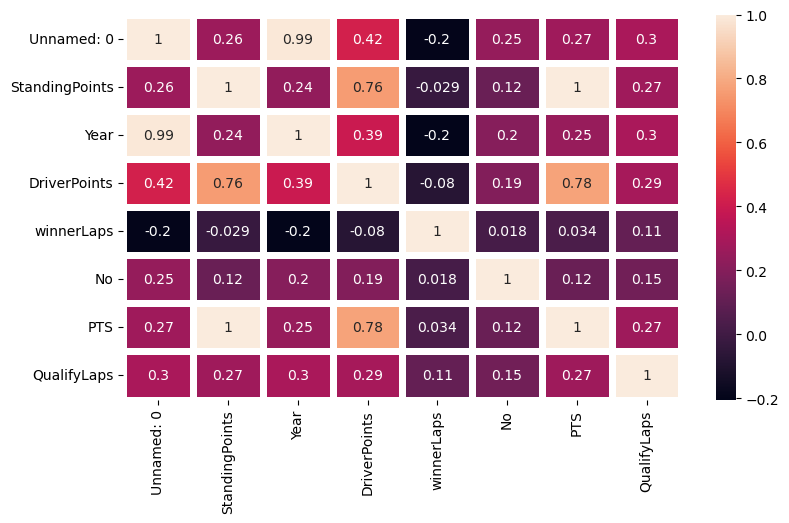

In [207]:
plt.figure(figsize=(9, 5))
sns.heatmap(numeric_df.corr(), annot=True, linewidth=5, linecolor='white')

<Axes: >

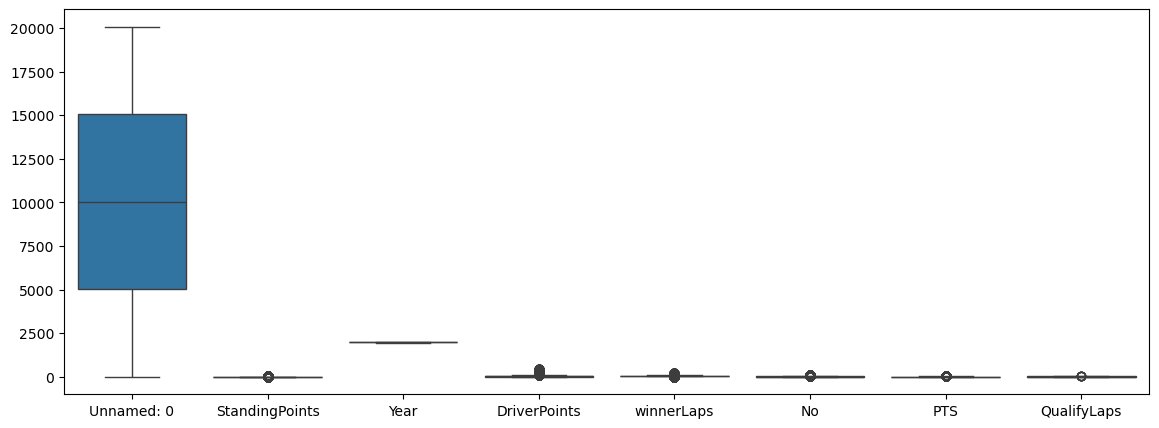

In [208]:
plt.figure(figsize=(14,5))
sns.boxplot(df)

In [209]:
df.shape

(20074, 23)

### Remove unrelated columns

In [212]:
# remove unrelated columns
df.drop(['Unnamed: 0','Driver','DriverPoints','winnerLaps','FinshTime','WinnerPosition','QualifyPositions','QualifyLaps','Time','DriverCars','WinnerCars','QualifyLaps'],inplace=True,axis=1)

In [213]:
df.shape

(20074, 12)

In [214]:
df.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3
0,13 May 1950,Great Britain,0.0,DNF,1950,8,Nino Farina,NaN,NaN,NaN,NaN,NaN
1,13 May 1950,Great Britain,NaN,4,1950,13,Nino Farina,NaN,NaN,NaN,NaN,NaN
2,13 May 1950,Great Britain,0.0,DNF,1950,9,Nino Farina,NaN,NaN,NaN,NaN,NaN
3,13 May 1950,Great Britain,0.0,8,1950,13,Nino Farina,NaN,NaN,NaN,NaN,NaN
4,13 May 1950,Great Britain,6.0,2,1950,3,Nino Farina,3.0,6.0,NaN,NaN,NaN


In [215]:
df.columns

Index(['Date', 'Grand Prix', 'StandingPoints', 'RacePosition', 'Year',
       'StandingPosition', 'Winner', 'No', 'PTS', 'Q1', 'Q2', 'Q3'],
      dtype='object')

#### **Removed Columns**


*   Unamed:0
*   Driver
*   DriverPoints
*   winnerlaps
*   FinishTime
*   WinnerPosition
*   QulifyPositoins
*   QualifyLaps
*   Time
*   DriversCars
*   winnersCars
*   QulifyLaps


### Remove Duplicate values

In [224]:
# How many duplicate data present?
df.duplicated().sum()

700

In [226]:
# REMOVE:- duplicate data
df=df.drop_duplicates()

In [228]:
df.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3
0,13 May 1950,Great Britain,0.0,DNF,1950,8,Nino Farina,NaN,NaN,NaN,NaN,NaN
1,13 May 1950,Great Britain,NaN,4,1950,13,Nino Farina,NaN,NaN,NaN,NaN,NaN
2,13 May 1950,Great Britain,0.0,DNF,1950,9,Nino Farina,NaN,NaN,NaN,NaN,NaN
3,13 May 1950,Great Britain,0.0,8,1950,13,Nino Farina,NaN,NaN,NaN,NaN,NaN
4,13 May 1950,Great Britain,6.0,2,1950,3,Nino Farina,3.0,6.0,NaN,NaN,NaN


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19374 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              19374 non-null  object 
 1   Grand Prix        19374 non-null  object 
 2   StandingPoints    19363 non-null  float64
 3   RacePosition      19358 non-null  object 
 4   Year              19374 non-null  int64  
 5   StandingPosition  17894 non-null  object 
 6   Winner            19374 non-null  object 
 7   No                6507 non-null   float64
 8   PTS               6507 non-null   float64
 9   Q1                3155 non-null   object 
 10  Q2                2820 non-null   object 
 11  Q3                2172 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.9+ MB


### Analayed unique values

##### StandingPosition

In [234]:
df['StandingPosition'].value_counts().sort_index()

StandingPosition
1     1032
10     917
11     872
12     835
13     764
14     772
15     827
16     717
17     666
18     657
19     689
2     1005
20     476
21     343
22     263
23     191
24     108
25     110
26      62
27      22
28       1
3      942
4     1014
5      921
6      961
7      952
8      881
9      877
DQ      17
Name: count, dtype: int64

In [236]:
# StandingPosition REPLACE :-
df['StandingPosition']=df['StandingPosition'].replace({'DQ': '0'})

In [238]:
df['StandingPosition'].unique()

array(['8', '13', '9', '3', '2', '1', '4', '5', '20', '7', '6', '19',
       '15', nan, '12', '11', '10', '16', '22', '18', '26', '17', '23',
       '25', '21', '27', '14', '24', '0', '28'], dtype=object)

##### RacePosition :-

In [241]:
# How many unique values are there ?
df['RacePosition'].unique()

array(['DNF', '4', '8', '2', '1', '3', '5', 'SHC', '9', '6', '7', '11',
       '10', '13', 'DSQ', '15', 'DNC', '14', '12', '16', 'DNS', '17',
       '18', '19', nan, '20', '21', '22', '23', '24', 'EXR'], dtype=object)

* DNC: Stands for Did Not Compete.
* DNS: Stands for Did Not Start.
* EXR: Stands for Excluded from Race.
* DSQ: Stands for Disqualifie.
* DNF: did not finish.
* SHC: the driver who gave up his car

In [244]:
df['RacePosition'].value_counts()

RacePosition
DNF    6468
1      1078
2      1074
3      1071
4      1064
5      1055
6      1003
7       863
8       820
9       744
10      670
11      602
12      529
13      487
14      407
15      359
16      284
17      224
18      145
19       91
DNC      75
DNS      59
SHC      56
20       45
DSQ      42
21       23
22       12
23        5
EXR       2
24        1
Name: count, dtype: int64

In [246]:
# REPLACE :- value that means nothing
df['RacePosition']=df['RacePosition'].replace({'DNC':0,'DNS':0,'DSQ':0,'EXR':0,'DNF':0,'SHC':0})

In [248]:
df['RacePosition'].unique()

array([0, '4', '8', '2', '1', '3', '5', '9', '6', '7', '11', '10', '13',
       '15', '14', '12', '16', '17', '18', '19', nan, '20', '21', '22',
       '23', '24'], dtype=object)

##### Year:-

In [251]:
df['Year'].value_counts().sort_index()

Year
1950     66
1951     85
1952     71
1953     80
1954    106
       ... 
2018    420
2019    420
2020    340
2021    440
2022    440
Name: count, Length: 73, dtype: int64

#### StandingPoints

In [254]:
df['StandingPoints'].unique()

array([ 0. ,  nan,  6. ,  9. ,  4. ,  2. ,  3. ,  1. ,  8. ,  5. ,  7. ,
        8.5,  6.5,  1.5,  3.5,  0.1,  3.1,  8.1,  6.1,  4.1,  3.3,  1.3,
        4.5,  0.5, 10. ,  2.5, 25. , 15. , 18. , 12. , 30. , 20. , 50. ,
       16. , 36. , 24. , 26. , 11. , 13. , 19. , 27. ,  7.5, 12.5, 34. ,
       32. , 17. , 22. ])

### Null values

In [257]:
df.isna().sum()

Date                    0
Grand Prix              0
StandingPoints         11
RacePosition           16
Year                    0
StandingPosition     1480
Winner                  0
No                  12867
PTS                 12867
Q1                  16219
Q2                  16554
Q3                  17202
dtype: int64

### Type Casting:-

In [260]:
# Handle non-finite values before conversion
# Fill remaining NaN values with a suitable value (e.g., 0)
df.RacePosition = df.RacePosition.fillna(0).astype('int64')  # Replace NaN with 0, for example

df.StandingPosition = df.StandingPosition.fillna(0).astype('int64')
df.StandingPoints = df.StandingPoints.fillna(0).astype('int64')

df.PTS = df.PTS.fillna(0).astype('int64')
df.No = df.No.fillna(0).astype('int64')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19374 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              19374 non-null  object
 1   Grand Prix        19374 non-null  object
 2   StandingPoints    19374 non-null  int64 
 3   RacePosition      19374 non-null  int64 
 4   Year              19374 non-null  int64 
 5   StandingPosition  19374 non-null  int64 
 6   Winner            19374 non-null  object
 7   No                19374 non-null  int64 
 8   PTS               19374 non-null  int64 
 9   Q1                3155 non-null   object
 10  Q2                2820 non-null   object
 11  Q3                2172 non-null   object
dtypes: int64(6), object(6)
memory usage: 1.9+ MB


In [264]:
df.isna().sum()

Date                    0
Grand Prix              0
StandingPoints          0
RacePosition            0
Year                    0
StandingPosition        0
Winner                  0
No                      0
PTS                     0
Q1                  16219
Q2                  16554
Q3                  17202
dtype: int64

In [266]:
df_1=df.copy()

# **Transforming the data**

---


In the dataset, the first year for which there is information about qualifying is 1994. The closest to the current format of qualifying was first introduced in 1996. It differs from the current system in limiting drivers to 12 laps only, while currently there is no limits on the number of laps to be completed. Huge changes and a lot af variation was introduced to the qualifying format between 2003 and 2005.

Starting with the year 2006, a three-part system of qualifying was introduced. These days, drivers are limited by the time in which they have to complete the fastest lap they can. After each qualifying round, 5 drivers with the worst lap times are eliminated, so only 10 advance to the final round (Q3). For these reasons, we limit the data to 1996 - 2001 and 2006 - 2022. (For which we have the full quality information)

SOURCE: https://www.formula1.com/en/latest/features/2016/3/deciding-the-grid-a-history-of-f1-qualifying-formats.html

In [271]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3
0,13 May 1950,Great Britain,0,0,1950,8,Nino Farina,0,0,NaN,NaN,NaN
1,13 May 1950,Great Britain,0,4,1950,13,Nino Farina,0,0,NaN,NaN,NaN
2,13 May 1950,Great Britain,0,0,1950,9,Nino Farina,0,0,NaN,NaN,NaN
3,13 May 1950,Great Britain,0,8,1950,13,Nino Farina,0,0,NaN,NaN,NaN
4,13 May 1950,Great Britain,6,2,1950,3,Nino Farina,3,6,NaN,NaN,NaN


The goal is to replace the strings representing lap times to numbers (msec). It will make the operations needed to be completed to create additional variables easier.

In [274]:
#PROBLEM: How many winner drivers didn't set a time in Q1 (= no pace established in quali)

print("No lap time in q1 set: ", df_1['Q1'].isnull().values.sum())

df_1 = df_1[df_1['Q1'].notnull()]

print("No lap time in q1 set (after removing): ", df_1['Q1'].isnull().values.sum())

No lap time in q1 set:  16219
No lap time in q1 set (after removing):  0


In [276]:
#PROBLEM: How many drivers didn't set a time in Q2 (= no pace established in quali)

print("No lap time in q1 set: ", df_1['Q2'].isnull().values.sum())

df_1 = df_1[df_1['Q2'].notnull()]

print("No lap time in q1 set (after removing): ", df_1['Q2'].isnull().values.sum())

No lap time in q1 set:  335
No lap time in q1 set (after removing):  0


In [278]:
  #PROBLEM: How many drivers didn't set a time in Q3 (= no pace established in quali)

print("No lap time in q1 set: ", df_1['Q3'].isnull().values.sum())

df_1= df_1[df_1['Q3'].notna()]

print("No lap time in q1 set (after removing): ", df_1['Q3'].isnull().values.sum())

No lap time in q1 set:  648
No lap time in q1 set (after removing):  0


In [280]:
# Need to reset indexing
df_1=df_1.reset_index()

In [282]:
#DROP:- index column
df_1.drop(columns='index',inplace=True,axis=1)

In [284]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3
0,12 Mar 2006,Bahrain,10,1,2006,1,Fernando Alonso,1,10,1:32.433,1:31.215,1:31.702
1,12 Mar 2006,Bahrain,5,4,2006,6,Fernando Alonso,12,5,1:32.603,1:32.025,1:31.549
2,12 Mar 2006,Bahrain,1,8,2006,18,Fernando Alonso,15,1,1:34.308,1:32.106,1:33.112
3,12 Mar 2006,Bahrain,0,9,2006,3,Fernando Alonso,6,0,1:33.579,1:32.014,1:31.478
4,12 Mar 2006,Bahrain,4,5,2006,8,Fernando Alonso,4,4,1:33.233,1:31.487,1:32.164


In [286]:
#Q1 Column
(df_1['Q1'].isin(['DNC', 'DNS', 'DSQ','EXR','DNF','SHC'])).value_counts(),(df_1['Q2'].isin(['DNC', 'DNS', 'DSQ','EXR','DNF','SHC'])).value_counts(),(df_1['Q3'].isin(['DNC', 'DNS', 'DSQ','EXR','DNF','SHC'])).value_counts()

(Q1
 False    2172
 Name: count, dtype: int64,
 Q2
 False    2172
 Name: count, dtype: int64,
 Q3
 False    2137
 True       35
 Name: count, dtype: int64)

In [288]:
# Q3 REPLACE :- value that means nothing
df_1['Q3']=df_1['Q3'].replace({'DNC':'0','DNS':'0','DSQ':'0','EXR':'0','DNF':'0','SHC':'0'})

In [290]:
(df_1['Q3'].isin(['DNC', 'DNS', 'DSQ','EXR','DNF','SHC'])).value_counts()

Q3
False    2172
Name: count, dtype: int64

In [292]:
#PROBLEM: splitting lap time strings into format [min, sec, msec]


def get_time_lst(df, col):

    col_lst = df[col].str.split(pat=':|\.').fillna(0)

    return col_lst


df_1['Q1_lst'] = get_time_lst(df_1, 'Q1')
df_1['Q2_lst'] = get_time_lst(df_1, 'Q2')
df_1['Q3_lst'] = get_time_lst(df_1, 'Q3')


print("Null values in dataframe: ",df_1.isnull().values.any())

Null values in dataframe:  False


In [294]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3,Q1_lst,Q2_lst,Q3_lst
0,12 Mar 2006,Bahrain,10,1,2006,1,Fernando Alonso,1,10,1:32.433,1:31.215,1:31.702,"[1, 32, 433]","[1, 31, 215]","[1, 31, 702]"
1,12 Mar 2006,Bahrain,5,4,2006,6,Fernando Alonso,12,5,1:32.603,1:32.025,1:31.549,"[1, 32, 603]","[1, 32, 025]","[1, 31, 549]"
2,12 Mar 2006,Bahrain,1,8,2006,18,Fernando Alonso,15,1,1:34.308,1:32.106,1:33.112,"[1, 34, 308]","[1, 32, 106]","[1, 33, 112]"
3,12 Mar 2006,Bahrain,0,9,2006,3,Fernando Alonso,6,0,1:33.579,1:32.014,1:31.478,"[1, 33, 579]","[1, 32, 014]","[1, 31, 478]"
4,12 Mar 2006,Bahrain,4,5,2006,8,Fernando Alonso,4,4,1:33.233,1:31.487,1:32.164,"[1, 33, 233]","[1, 31, 487]","[1, 32, 164]"


**Convert min to seconds for better calcuation**

In [297]:
def convert_to_msec(time_lst):

    if time_lst != 0 and len(time_lst) == 3:

      return int(time_lst[0])*60000 + int(time_lst[1])*1000 + int(time_lst[2])

    return 0

df_1['q1Msec'] = df_1.apply(lambda x: convert_to_msec(x['Q1_lst']), axis=1)
df_1['q2Msec'] = df_1.apply(lambda x: convert_to_msec(x['Q2_lst']), axis=1)
df_1['q3Msec'] = df_1.apply(lambda x: convert_to_msec(x['Q3_lst']), axis=1)


print("Null values in dataframe (added q_Msec): ",df_1.isnull().values.any())

Null values in dataframe (added q_Msec):  False


In [299]:
#ADD: Max Pace in session

df_1['maxPace'] = df_1.loc[:, ['q1Msec', 'q2Msec', 'q3Msec']].max(axis=1)

print("Null values in dataframe (added maxPace): ",df_1.isnull().values.any())

Null values in dataframe (added maxPace):  False


In [301]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,Q1,Q2,Q3,Q1_lst,Q2_lst,Q3_lst,q1Msec,q2Msec,q3Msec,maxPace
0,12 Mar 2006,Bahrain,10,1,2006,1,Fernando Alonso,1,10,1:32.433,1:31.215,1:31.702,"[1, 32, 433]","[1, 31, 215]","[1, 31, 702]",92433,91215,91702,92433
1,12 Mar 2006,Bahrain,5,4,2006,6,Fernando Alonso,12,5,1:32.603,1:32.025,1:31.549,"[1, 32, 603]","[1, 32, 025]","[1, 31, 549]",92603,92025,91549,92603
2,12 Mar 2006,Bahrain,1,8,2006,18,Fernando Alonso,15,1,1:34.308,1:32.106,1:33.112,"[1, 34, 308]","[1, 32, 106]","[1, 33, 112]",94308,92106,93112,94308
3,12 Mar 2006,Bahrain,0,9,2006,3,Fernando Alonso,6,0,1:33.579,1:32.014,1:31.478,"[1, 33, 579]","[1, 32, 014]","[1, 31, 478]",93579,92014,91478,93579
4,12 Mar 2006,Bahrain,4,5,2006,8,Fernando Alonso,4,4,1:33.233,1:31.487,1:32.164,"[1, 33, 233]","[1, 31, 487]","[1, 32, 164]",93233,91487,92164,93233


In [303]:
#ADD: Mean Pace per session

df_1['meanPace'] = df_1.loc[:, ['q1Msec', 'q2Msec', 'q3Msec']].sum(axis=1) / (df_1.loc[:, ['q1Msec', 'q2Msec', 'q3Msec']] != 0).sum(axis=1)

print("Null values in dataframe (added meanPace): ",df_1.isnull().values.any())

df_1= df_1.drop(['Q1_lst', 'Q2_lst', 'Q3_lst', 'Q1', 'Q2', 'Q3'], axis = 1)

df_1= df_1[df_1['meanPace'].notna()]

print("Null values in dataframe (After removing): ",df_1.isnull().values.any())


Null values in dataframe (added meanPace):  True
Null values in dataframe (After removing):  False


# **Checking the outliers and correlations**

---



In [306]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,q1Msec,q2Msec,q3Msec,maxPace,meanPace
0,12 Mar 2006,Bahrain,10,1,2006,1,Fernando Alonso,1,10,92433,91215,91702,92433,91783.333333
1,12 Mar 2006,Bahrain,5,4,2006,6,Fernando Alonso,12,5,92603,92025,91549,92603,92059.000000
2,12 Mar 2006,Bahrain,1,8,2006,18,Fernando Alonso,15,1,94308,92106,93112,94308,93175.333333
3,12 Mar 2006,Bahrain,0,9,2006,3,Fernando Alonso,6,0,93579,92014,91478,93579,92357.000000
4,12 Mar 2006,Bahrain,4,5,2006,8,Fernando Alonso,4,4,93233,91487,92164,93233,92294.666667


In [308]:
df_1.shape

(2164, 14)

In [310]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 2171
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2164 non-null   object 
 1   Grand Prix        2164 non-null   object 
 2   StandingPoints    2164 non-null   int64  
 3   RacePosition      2164 non-null   int64  
 4   Year              2164 non-null   int64  
 5   StandingPosition  2164 non-null   int64  
 6   Winner            2164 non-null   object 
 7   No                2164 non-null   int64  
 8   PTS               2164 non-null   int64  
 9   q1Msec            2164 non-null   int64  
 10  q2Msec            2164 non-null   int64  
 11  q3Msec            2164 non-null   int64  
 12  maxPace           2164 non-null   int64  
 13  meanPace          2164 non-null   float64
dtypes: float64(1), int64(10), object(3)
memory usage: 253.6+ KB


In [312]:
# type casting:-
df_1.meanPace = df_1.meanPace.astype('int64')

In [314]:
df_1.shape

(2164, 14)

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

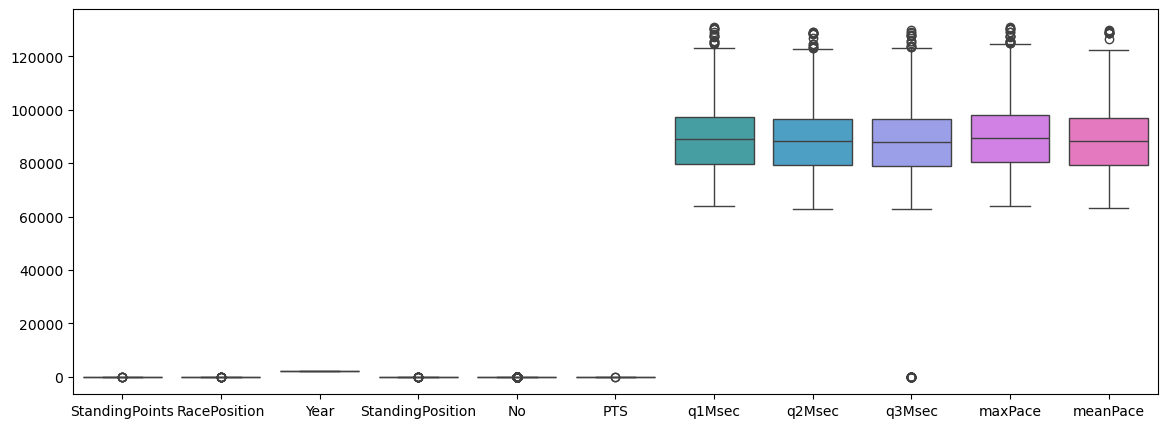

In [318]:
plt.figure(figsize=(14,5))
sns.boxplot(df_1)

not able to comprehend whether outliears are present. Every column needs to be examined.

StandingPoints         Axes(0.125,0.653529;0.133621x0.226471)
RacePosition        Axes(0.285345,0.653529;0.133621x0.226471)
Year                 Axes(0.44569,0.653529;0.133621x0.226471)
StandingPosition    Axes(0.606034,0.653529;0.133621x0.226471)
No                  Axes(0.766379,0.653529;0.133621x0.226471)
PTS                    Axes(0.125,0.381765;0.133621x0.226471)
q1Msec              Axes(0.285345,0.381765;0.133621x0.226471)
q2Msec               Axes(0.44569,0.381765;0.133621x0.226471)
q3Msec              Axes(0.606034,0.381765;0.133621x0.226471)
maxPace             Axes(0.766379,0.381765;0.133621x0.226471)
meanPace                   Axes(0.125,0.11;0.133621x0.226471)
dtype: object

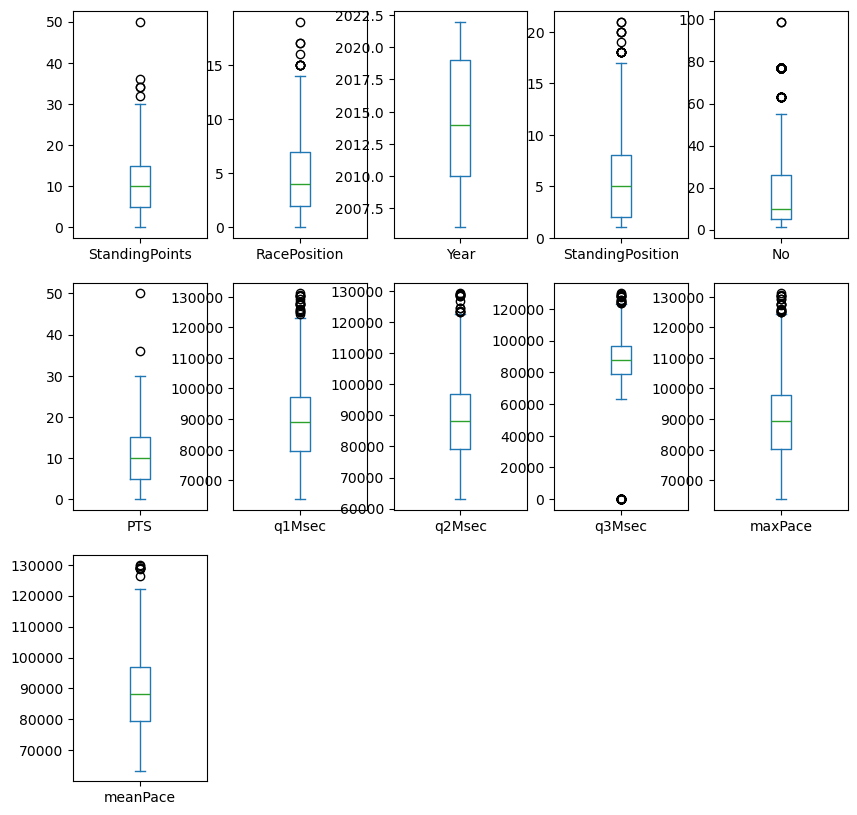

In [321]:
df_1.plot(kind="box", subplots=True, layout=(3,5), figsize=(10,10))

cannot remove any leftover outliers; those outliers may be ignored

In [323]:
# Select only numeric columns for correlation calculation
numeric_df = df_1.select_dtypes(include=['number'])
numeric_df.corr()

,StandingPoints,RacePosition,Year,StandingPosition,No,PTS,q1Msec,q2Msec,q3Msec,maxPace,meanPace
StandingPoints,1.000000,-0.823108,0.305428,-0.576464,0.152084,0.997824,-0.067097,-0.077421,-0.011061,-0.072857,-0.082711
RacePosition,-0.823108,1.000000,-0.028658,0.611428,-0.049174,-0.825475,0.113296,0.120704,0.002513,0.115478,0.123062
Year,0.305428,-0.028658,1.000000,-0.044867,0.439690,0.298322,-0.068381,-0.075700,-0.056329,-0.076595,-0.080062
StandingPosition,-0.576464,0.611428,-0.044867,1.000000,-0.087972,-0.576983,0.083504,0.095200,0.035129,0.095419,0.099173
No,0.152084,-0.049174,0.439690,-0.087972,1.000000,0.149820,-0.070364,-0.071118,-0.043027,-0.075891,-0.073520
PTS,0.997824,-0.825475,0.298322,-0.576983,0.149820,1.000000,-0.060030,-0.070023,-0.006281,-0.067139,-0.075998
q1Msec,-0.067097,0.113296,-0.068381,0.083504,-0.070364,-0.060030,1.000000,0.980931,0.698180,0.978488,0.989128
q2Msec,-0.077421,0.120704,-0.075700,0.095200,-0.071118,-0.070023,0.980931,1.000000,0.714188,0.982596,0.995609
q3Msec,-0.011061,0.002513,-0.056329,0.035129,-0.043027,-0.006281,0.698180,0.714188,1.000000,0.722147,0.719612
maxPace,-0.072857,0.115478,-0.076595,0.095419,-0.075891,-0.067139,0.978488,0.982596,0.722147,1.000000,0.991309


<Axes: >

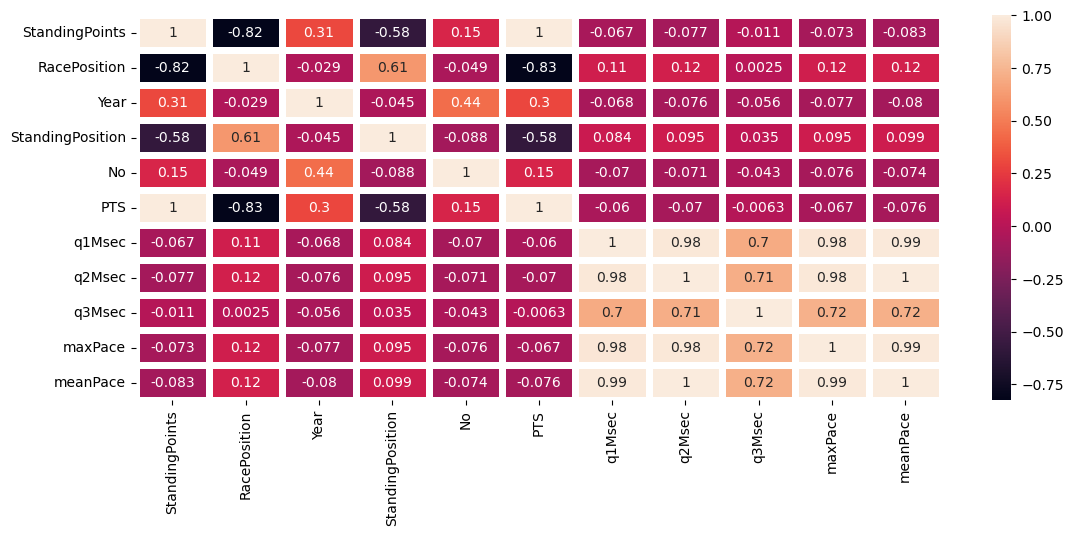

In [324]:
plt.figure(figsize=(13, 5))
sns.heatmap(numeric_df.corr(), annot=True, linewidth=5, linecolor='white')

# Top 10 winner visualization report

Text(0.5, 0, 'Number of GP wins')

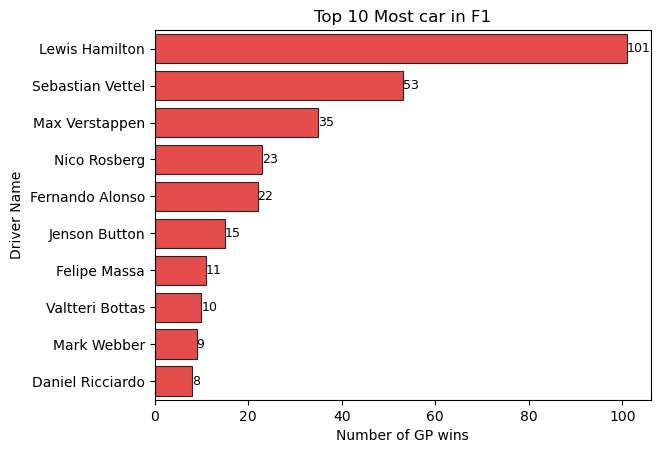

In [328]:
# Assuming 'df' and 'df_1' should be the same DataFrame # RacePosition
driver_winner = df_1.loc[df_1['RacePosition']==1].groupby('Winner')['RacePosition'].count().sort_values(ascending=False).to_frame()
top10drivers = driver_winner.head(10)
ax=sns.barplot(data=top10drivers,y='Winner',x='RacePosition',color='red',alpha=0.8,linewidth=.8,edgecolor='black')
ax.bar_label(ax.containers[0], fontsize=9);
plt.title('Top 10 Most car in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

This visualisation displays the driver with the top 10 race victories between 2006 and 2022.

# Top 5 winner visualization report

Text(0.5, 0, 'Number of GP wins')

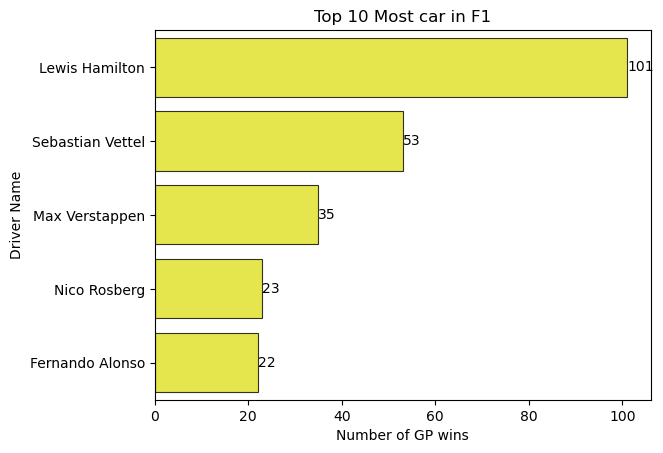

In [332]:
driver_winner = df_1.loc[df_1['RacePosition']==1].groupby('Winner')['RacePosition'].count().sort_values(ascending=False).to_frame()
top5drivers = driver_winner.head(5)
ax=sns.barplot(data=top5drivers,y='Winner',x='RacePosition',color='yellow',alpha=0.8,linewidth=.8,edgecolor='black')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Top 10 Most car in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

This visualisation displays the driver with the top 5 race victories between 2006 and 2022.

In [340]:
df_1.columns

Index(['Date', 'Grand Prix', 'StandingPoints', 'RacePosition', 'Year',
       'StandingPosition', 'Winner', 'No', 'PTS', 'q1Msec', 'q2Msec', 'q3Msec',
       'maxPace', 'meanPace'],
      dtype='object')

In [342]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,q1Msec,q2Msec,q3Msec,maxPace,meanPace
0,12 Mar 2006,Bahrain,10,1,2006,1,Fernando Alonso,1,10,92433,91215,91702,92433,91783
1,12 Mar 2006,Bahrain,5,4,2006,6,Fernando Alonso,12,5,92603,92025,91549,92603,92059
2,12 Mar 2006,Bahrain,1,8,2006,18,Fernando Alonso,15,1,94308,92106,93112,94308,93175
3,12 Mar 2006,Bahrain,0,9,2006,3,Fernando Alonso,6,0,93579,92014,91478,93579,92357
4,12 Mar 2006,Bahrain,4,5,2006,8,Fernando Alonso,4,4,93233,91487,92164,93233,92294


# Check Unique values

---
Converting categorical data to numerical format


In [345]:
df_1['Grand Prix'].nunique(),df_1['Winner'].nunique()

(37, 23)

In [347]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1['Winner'] = le.fit_transform(df_1['Winner'])

In [348]:
# Grand_Prix
# Compute the frequency of each category
freq = df_1['Grand Prix'].value_counts()

# Map the frequencies to the dataframe
df_1['Grand Prix'] = df_1['Grand Prix'].map(freq)

In [351]:
df_1.head()

,Date,Grand Prix,StandingPoints,RacePosition,Year,StandingPosition,Winner,No,PTS,q1Msec,q2Msec,q3Msec,maxPace,meanPace
0,12 Mar 2006,113,10,1,2006,1,5,1,10,92433,91215,91702,92433,91783
1,12 Mar 2006,113,5,4,2006,6,5,12,5,92603,92025,91549,92603,92059
2,12 Mar 2006,113,1,8,2006,18,5,15,1,94308,92106,93112,94308,93175
3,12 Mar 2006,113,0,9,2006,3,5,6,0,93579,92014,91478,93579,92357
4,12 Mar 2006,113,4,5,2006,8,5,4,4,93233,91487,92164,93233,92294


# Analysis
---
We want to perform classification using machine learning models

We want to predict 4 aspects.

being in top5
being in top10
winner from top5
winner from top10

# **Machine learning Model**

In [392]:
from matplotlib import pyplot
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Comparison Of Classification Models Accuracy
---
In this kernal i am going to study each models below and find accuracy of it then compare
* Logistic Regression Classification
* KNN Classification
* SVM Classification
* Naive Byes Classification
* Decision Tree Classification
* Random Forest Classification

In [395]:
# holding results in a list
scores_accuracy=[]
model_name=[]

Decision Tree

In [398]:
def DecisionTree_Model(X, Y, test_size = 0.2, cv = 5):
    X = X.values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    DT=DecisionTreeClassifier()

    cv_scores = cross_val_score(DT, X, Y, cv=cv, scoring='accuracy')

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    DT.fit(X_train, Y_train)
    predictions = DT.predict(X_test)


    accuracy_DT = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_DT:.4f}')

    scores_accuracy.append(['Decision Tree',accuracy_DT])
    model_name.append(["DecisionTreeClassifier"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

XGBoost Model

In [401]:
def XGBoost_model(X, Y, test_size = 0.2, cv = 5):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    XG = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(Y)), random_state=42)

    cv_scores = cross_val_score(XG, X, Y, cv=cv, scoring='accuracy')  # Adjust cv parameter as needed

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    XG.fit(X_train, Y_train)
    predictions = XG.predict(X_test)

    accuracy_XG = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_XG:.4f}')

    scores_accuracy.append(['XGBoost',accuracy_XG])
    model_name.append(["XGBClassifier"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

Naive Bayesian

In [404]:
def MultinomialNB_model(X, Y, test_size = 0.2, cv = 10):
    '''Naive Bayesian ML model where X is one variable'''

    X = X.values.reshape(-1,1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    NB = MultinomialNB()

    cv_scores = cross_val_score(NB, X, Y, cv=cv, scoring='accuracy')  # Adjust cv parameter as needed

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    NB.fit(X_train, Y_train)
    predictions = NB.predict(X_test)

    accuracy_NB = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_NB:.4f}')

    scores_accuracy.append(['Naive Bayesian',accuracy_NB])
    model_name.append(["Naive Bayesian"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

LogisticRegression_model

In [407]:
def LogisticRegression_model(X, Y, test_size = 0.2, cv = 5):

    X = X.values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    LR = LogisticRegression()

    cv_scores = cross_val_score(LR, X, Y, cv=cv, scoring='accuracy')  # Adjust cv parameter as needed

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    LR.fit(X_train, Y_train)
    predictions = LR.predict(X_test)

    accuracy_LR = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_LR:.4f}')

    scores_accuracy.append(['LogisticRegression',accuracy_LR])
    model_name.append(["LogisticRegression"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

Support Vector Machine

In [410]:
def SVM_model(X, Y, test_size = 0.2, cv = 5):

    X = X.values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    SVM = SVC()

    cv_scores = cross_val_score(SVM, X, Y, cv=cv, scoring='accuracy')  # Adjust cv parameter as needed

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    SVM.fit(X_train, Y_train)
    predictions = SVM.predict(X_test)

    accuracy_SVM = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_SVM:.4f}')

    scores_accuracy.append(['SVM',accuracy_SVM])
    model_name.append(["SVM"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

Random Forest

In [413]:
def Randomforest_Model(X, Y, test_size = 0.2, cv = 5):

    X = X.values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    RF= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees

    cv_scores = cross_val_score(RF, X, Y, cv=cv, scoring='accuracy')

    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))

    RF.fit(X_train, Y_train)
    predictions = RF.predict(X_test)


    accuracy_RF = accuracy_score(Y_test, predictions)
    print(f'Test Accuracy: {accuracy_RF:.4f}')

    scores_accuracy.append(['Random Forest',accuracy_RF])
    model_name.append(["RandomForestClassifier"])

    print("Classification Report:")
    print(classification_report(Y_test, predictions))

We used four machine learning classifier models for prediction models.

In [416]:
def Models_scores(X, Y, test_size = 0.2, cv = 5):
    '''prints scores from all the models provided above'''

    print("XGBoost")
    XGBoost_model(X, Y, test_size, cv)

    print("Naive Bayesian")
    MultinomialNB_model(X, Y, test_size, cv)

    print("Logistic Regression")
    LogisticRegression_model(X, Y, test_size, cv)

    print("SVM")
    SVM_model(X, Y, test_size, cv)

    print("Decision Tree")
    DecisionTree_Model(X,Y,test_size,cv)

    print("Random Forest")
    Randomforest_Model(X,Y,test_size,cv)


# **Approches**

In [419]:
# Winners within Top 10
Y_top10 = df_1["RacePosition"].apply(lambda x: 0 if x <= 10 else 1)

### **First Approch**

StandingPostion vs Raceposition

In [423]:
X=df_1["StandingPosition"]

In [425]:
 Models_scores(X,Y_top10)

XGBoost
Cross-Validation Scores: [0.94688222 0.94919169 0.94919169 0.94919169 0.9537037 ]
Mean Accuracy: 0.9496321957060987
Test Accuracy: 0.9376
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       405
           1       1.00      0.04      0.07        28

    accuracy                           0.94       433
   macro avg       0.97      0.52      0.52       433
weighted avg       0.94      0.94      0.91       433

Naive Bayesian
Cross-Validation Scores: [0.94919169 0.94919169 0.94919169 0.94919169 0.95138889]
Mean Accuracy: 0.9496311265075701
Test Accuracy: 0.9353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       405
           1       0.00      0.00      0.00        28

    accuracy                           0.94       433
   macro avg       0.47      0.50      0.48       433
weighted avg       0.87      0.94      0.90       433

L

Using StandingPosition,RacePosition, accuracy has decreased as compared to test accuracy.

In [428]:
scores_accuracy

[['XGBoost', 0.9376443418013857],
 ['Naive Bayesian', 0.9353348729792148],
 ['LogisticRegression', 0.9376443418013857],
 ['SVM', 0.9353348729792148],
 ['Decision Tree', 0.9376443418013857],
 ['Random Forest', 0.9376443418013857]]

In [430]:
model_name

[['XGBClassifier'],
 ['Naive Bayesian'],
 ['LogisticRegression'],
 ['SVM'],
 ['DecisionTreeClassifier'],
 ['RandomForestClassifier']]

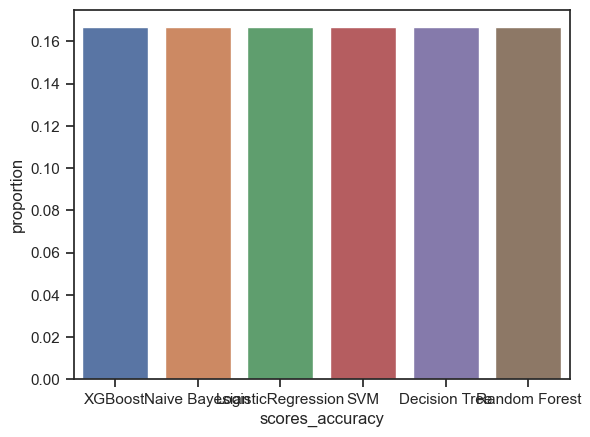

In [432]:
import seaborn as sns
import pandas as pd

# Assuming 'scores_accuracy' is a list of accuracy scores and 'model_name' is a list of corresponding model names
data = { 'scores_accuracy': scores_accuracy}
df = pd.DataFrame(data)

# Flatten the 'scores_accuracy' column if it contains nested lists
df['scores_accuracy'] = df['scores_accuracy'].apply(lambda x: x[0] if isinstance(x, list) else x)

sns.countplot(data=df, x='scores_accuracy',stat='proportion',hue='scores_accuracy')
plt.rotations=45
plt.show()

<Axes: xlabel='scores_accuracy', ylabel='Count'>

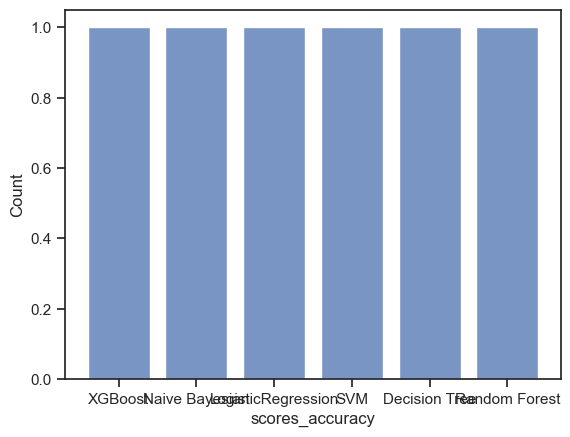

In [434]:
sns.histplot(data=df, x="scores_accuracy", shrink=.8)

### **Second Approch**
---
raceposition vs winner

In [437]:
X=df_1['Winner']

In [439]:
Models_scores(X,Y_top10)

XGBoost
Cross-Validation Scores: [0.94919169 0.94919169 0.94919169 0.94919169 0.95138889]
Mean Accuracy: 0.9496311265075701
Test Accuracy: 0.9353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       405
           1       0.00      0.00      0.00        28

    accuracy                           0.94       433
   macro avg       0.47      0.50      0.48       433
weighted avg       0.87      0.94      0.90       433

Naive Bayesian
Cross-Validation Scores: [0.94919169 0.94919169 0.94919169 0.94919169 0.95138889]
Mean Accuracy: 0.9496311265075701
Test Accuracy: 0.9353
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       405
           1       0.00      0.00      0.00        28

    accuracy                           0.94       433
   macro avg       0.47      0.50      0.48       433
weighted avg       0.87      0.94      0.90       433

L

# Thrid Approach

In [441]:
# Winners within Top 10
Y_top10 = df_1["StandingPosition"].apply(lambda x: 0 if x <= 10 else 1)

In [442]:
X=df_1["Winner"]

# Years

In [446]:
 Models_scores(X,Y_top10)

XGBoost
Cross-Validation Scores: [0.84295612 0.86605081 0.86374134 0.86374134 0.86574074]
Mean Accuracy: 0.8604460696262082
Test Accuracy: 0.8568
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       371
           1       0.00      0.00      0.00        62

    accuracy                           0.86       433
   macro avg       0.43      0.50      0.46       433
weighted avg       0.73      0.86      0.79       433

Naive Bayesian
Cross-Validation Scores: [0.86605081 0.86605081 0.86374134 0.86374134 0.86574074]
Mean Accuracy: 0.8650650072705501
Test Accuracy: 0.8568
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       371
           1       0.00      0.00      0.00        62

    accuracy                           0.86       433
   macro avg       0.43      0.50      0.46       433
weighted avg       0.73      0.86      0.79       433

L

In [448]:
# Winners within Top 10
Y_top10 = df_1["Winner"].apply(lambda x: 0 if x <= 10 else 1)

In [449]:
X=df_1["Year"]

In [453]:
 Models_scores(X,Y_top10)

XGBoost
Cross-Validation Scores: [0.39722864 0.35103926 0.47113164 0.24249423 0.75462963]
Mean Accuracy: 0.44330467881276203
Test Accuracy: 0.8129
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.44      0.52       101
           1       0.84      0.93      0.88       332

    accuracy                           0.81       433
   macro avg       0.75      0.68      0.70       433
weighted avg       0.80      0.81      0.80       433

Naive Bayesian
Cross-Validation Scores: [0.75288684 0.75288684 0.75288684 0.7551963  0.75462963]
Mean Accuracy: 0.753697288512531
Test Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.77      1.00      0.87       332

    accuracy                           0.77       433
   macro avg       0.38      0.50      0.43       433
weighted avg       0.59      0.77      0.67       433

L

# **Conclusion:**


---

* **Predictive Modeling Potential**: The insights gained can be used to develop predictive models for race outcomes, enhancing viewer engagement and attracting sponsorships for media companies.
* **Data-Driven Storytelling**: Media companies can leverage the analyzed data to create compelling narratives and visualizations, enriching the fan experience.
* **Future Directions**: Further analysis could involve incorporating additional data sources, such as weather conditions and tire strategies, to refine predictive models.

# **End Result:**

---


* **Cleaned and Merged Data**: Consolidated relevant data from multiple datasets into a single comprehensive dataset.
* **Exploratory Data Analysis**: Conducted EDA to identify trends, correlations, and patterns in driver performance, qualifying positions, pit stop strategies, and race results.
* **Insights**: Uncovered potential predictive factors for race outcomes, such as starting grid position, qualifying performance, and driver consistency.
